<a href="https://colab.research.google.com/github/rishab-gangwar/Explaining-CNNs/blob/master/fashionMnistTrain_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import torchvision
from torchvision import transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader

In [ ]:
data=FashionMNIST(root='',download=True,train=True,transform=transforms.ToTensor() )

In [ ]:
batch_size=20
data_load=DataLoader(data,batch_size=batch_size,shuffle=True)



torch.Size([20, 1, 28, 28]) torch.Size([20])


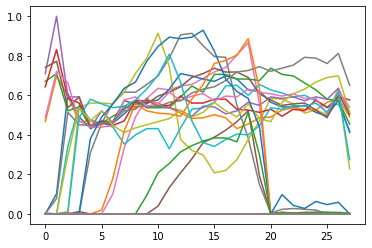

In [ ]:
data_=iter(data_load)
images,labels= data_.next()
plt.plot(images[1,0])
print(images.shape,labels.shape)

In [ ]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

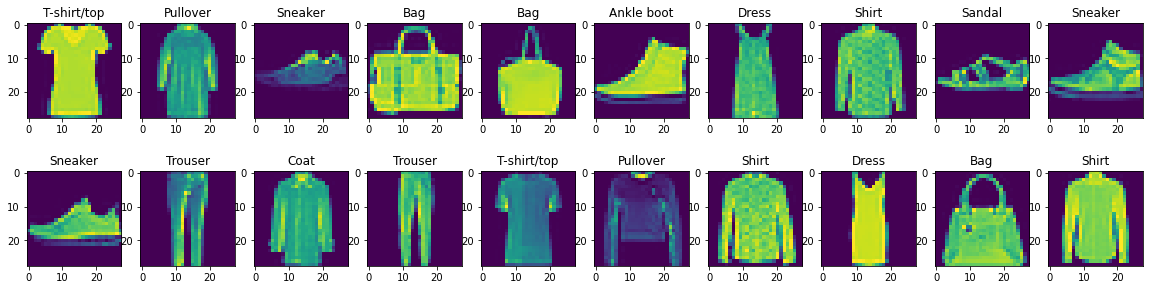

In [ ]:
images.numpy()
#plt.imshow(np.squeeze(images[3]))
fig=plt.figure(figsize=(20,5))
for i in range(20):
    ax=fig.add_subplot(2,10,i+1)
    ax.imshow(np.squeeze(images[i]))
    ax.set_title(classes[(labels[i])])

In [69]:
pwd

'/content'

# ML

In [75]:
import torch.nn.functional as f
class Net(nn.Module):
  def __init__(self):
    super(Net,self) .__init__()
    self.conv1=nn.Conv2d(1,10,3)#(1*28*28 -> 10*26*26)
    self.pool = nn.MaxPool2d(2,3)#(10*26*26 -> 10*13*13)
    self.conv2 = nn.Conv2d(10,20,3)#(10*13*13 -> 20*11*11)
    self.fc1=nn.Linear(20*5*5,50)
    self.fc1_drop= nn.Dropout(.4)
    self.fc2=nn.Linear(50,10)
  def forward(self,x):
    x = self.conv1(x)
    x = self.pool(f.relu(x))
    x = self.conv2(x)
    x = self.pool(f.relu(x))
    x = x.view(x.size(0),-1)
    x = self.fc1(x)
    x = self.fc1_drop(x)
    x = self.fc2(x)
    return x
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=3, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=500, out_features=50, bias=True)
  (fc1_drop): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [76]:
net = Net()

net.load_state_dict(torch.load('fashion_net_ex.pt'))

print(net)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=3, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=500, out_features=50, bias=True)
  (fc1_drop): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [76]:
weights = net.conv1.weight.data
w = weights.numpy()

fig=plt.figure(figsize=(16, 8))
columns = 5
rows = 2
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(w[i][0], cmap='gray')
    
print('First convolutional layer')
plt.show()

weights = net.conv2.weight.data
w = weights.numpy()